In [1]:
#import library
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
#read data
books = pd.read_csv("books_dataset.csv",sep=",")
books.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


Dataset:

    bookID: Contains the unique ID for each book
    title: contains the titles of the books
    authors: contains the author of the particular book
    average_rating: the average rating of the books, as decided by the users
    isbn: number, tells the information about a book - such as edition and publisher
    isbn13: The new format for ISBN, implemented in 2007. 13 digits
    language_code: Tells the language for the books
    num_pages: Contains the number of pages for the book
    ratings_count: Contains the number of ratings given for the book
    text_reviews_count: Has the count of reviews left by users
    publication_date: Date when the book was first published
    publisher: The name of the publisher.

In [3]:
#check missing value
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11127 non-null  int64  
 1   title               11127 non-null  object 
 2   authors             11127 non-null  object 
 3   average_rating      11127 non-null  float64
 4   isbn                11127 non-null  object 
 5   isbn13              11127 non-null  int64  
 6   language_code       11127 non-null  object 
 7   num_pages           11127 non-null  int64  
 8   ratings_count       11127 non-null  int64  
 9   text_reviews_count  11127 non-null  int64  
 10  publication_date    11127 non-null  object 
 11  publisher           11127 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


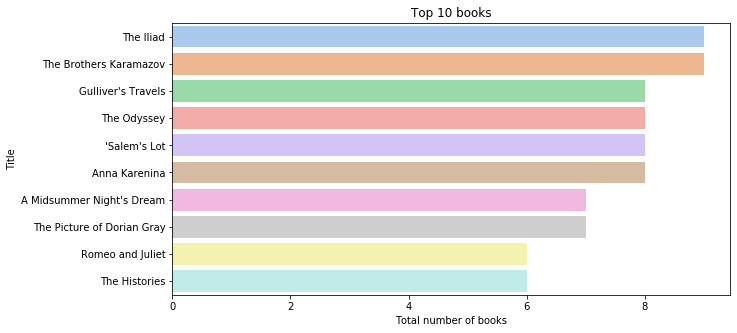

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

#Top 10 books
books_title = books['title'].value_counts()[:10]
plt.figure(figsize=(10,5))
g = sns.barplot(x=books_title,y=books_title.index,palette="pastel")
g.set_title("Top 10 books")
g.set_xlabel("Total number of books")
g.set_ylabel("Title")
plt.show()
    

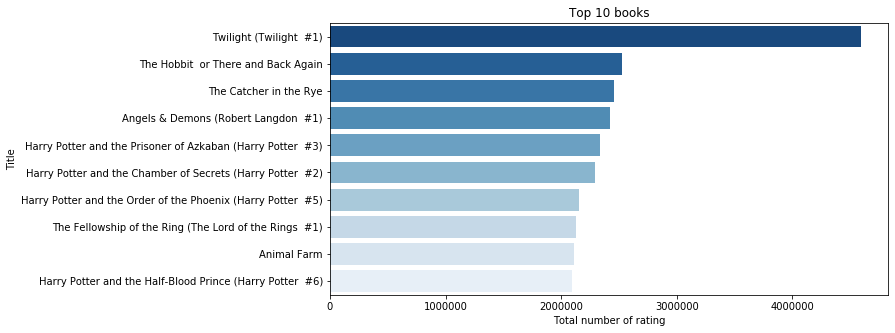

In [81]:
#Top 10 rated books
top_10 = books.sort_values('ratings_count', ascending = False).head(10).set_index('title')
plt.figure(figsize=(10,5))
g = sns.barplot(x=top_10['ratings_count'],y=top_10.index, palette="Blues_r") 
g.set_title("Top 10 books")
g.set_xlabel("Total number of rating")
g.set_ylabel("Title")
plt.show()

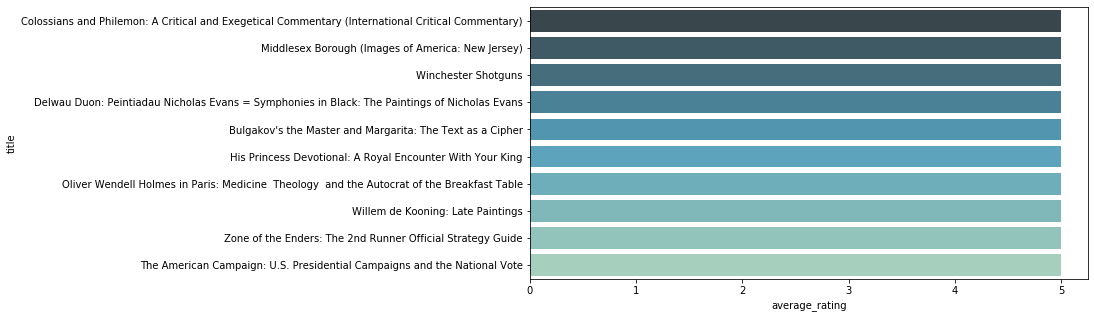

In [79]:
#Top 10 books based on avarage rating
top_10_avg = books.sort_values('average_rating', ascending = False).head(10).set_index('title')
plt.figure(figsize=(10,5))
g = sns.barplot(x=top_10_avg['average_rating'],y=top_10_avg.index,palette="GnBu_d")                 
plt.show()

In [4]:
#change author name to list
books['authors'] = books['authors'].apply(lambda row: row.split('/'))
#change publisher name to list
books['publisher'] = books['publisher'].apply(lambda row: row.split('/'))

In [5]:
#get only english books
english_book = ["en-US", "en-GB", "eng", "en-CA"]
data_book_eng = books[books['language_code'].isin(english_book)].copy()
data_book_eng.loc[:,'language_code'] = 'english'
data_book_eng['language_code'].value_counts()

english    10541
Name: language_code, dtype: int64

In [6]:
data_book_eng = data_book_eng.reset_index(drop=True)
data_book_eng.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,"[J.K. Rowling, Mary GrandPré]",4.57,0439785960,9780439785969,english,652,2095690,27591,9/16/2006,[Scholastic Inc.]
1,2,Harry Potter and the Order of the Phoenix (Har...,"[J.K. Rowling, Mary GrandPré]",4.49,0439358078,9780439358071,english,870,2153167,29221,9/1/2004,[Scholastic Inc.]
2,4,Harry Potter and the Chamber of Secrets (Harry...,[J.K. Rowling],4.42,0439554896,9780439554893,english,352,6333,244,11/1/2003,[Scholastic]
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,"[J.K. Rowling, Mary GrandPré]",4.56,043965548X,9780439655484,english,435,2339585,36325,5/1/2004,[Scholastic Inc.]
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,"[J.K. Rowling, Mary GrandPré]",4.78,0439682584,9780439682589,english,2690,41428,164,9/13/2004,[Scholastic]


In [7]:
books_eng = data_book_eng.drop(['bookID','isbn','isbn13','num_pages','language_code','text_reviews_count'], axis=1)
books_eng.head()

,title,authors,average_rating,ratings_count,publication_date,publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,"[J.K. Rowling, Mary GrandPré]",4.57,2095690,9/16/2006,[Scholastic Inc.]
1,Harry Potter and the Order of the Phoenix (Har...,"[J.K. Rowling, Mary GrandPré]",4.49,2153167,9/1/2004,[Scholastic Inc.]
2,Harry Potter and the Chamber of Secrets (Harry...,[J.K. Rowling],4.42,6333,11/1/2003,[Scholastic]
3,Harry Potter and the Prisoner of Azkaban (Harr...,"[J.K. Rowling, Mary GrandPré]",4.56,2339585,5/1/2004,[Scholastic Inc.]
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,"[J.K. Rowling, Mary GrandPré]",4.78,41428,9/13/2004,[Scholastic]


In [8]:
#classification based on title, author, publisher
feature_df = books_eng[['title','authors','publisher']].copy()

#show top 5
print(feature_df.head())

                                               title  \
0  Harry Potter and the Half-Blood Prince (Harry ...   
1  Harry Potter and the Order of the Phoenix (Har...   
2  Harry Potter and the Chamber of Secrets (Harry...   
3  Harry Potter and the Prisoner of Azkaban (Harr...   
4  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   

                         authors          publisher  
0  [J.K. Rowling, Mary GrandPré]  [Scholastic Inc.]  
1  [J.K. Rowling, Mary GrandPré]  [Scholastic Inc.]  
2                 [J.K. Rowling]       [Scholastic]  
3  [J.K. Rowling, Mary GrandPré]  [Scholastic Inc.]  
4  [J.K. Rowling, Mary GrandPré]       [Scholastic]  


In [9]:
#eliminate spaces
def sanitize(x):
    try:
        #if cell is a list
        if isinstance(x, list):
            return [i.replace(' ','').lower() for i in x]
        #if cell is a string
        else:
            return [x.replace(' ','').lower()]
    except:
        print(x)
        
#coloum : authors, publisher        
feature_cols = ['authors','publisher']

#Apply function sanitize 
for col in feature_cols:
    feature_df[col] = feature_df[col].apply(sanitize)

In [10]:
feature_df.head()

,title,authors,publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,"[j.k.rowling, marygrandpré]",[scholasticinc.]
1,Harry Potter and the Order of the Phoenix (Har...,"[j.k.rowling, marygrandpré]",[scholasticinc.]
2,Harry Potter and the Chamber of Secrets (Harry...,[j.k.rowling],[scholastic]
3,Harry Potter and the Prisoner of Azkaban (Harr...,"[j.k.rowling, marygrandpré]",[scholasticinc.]
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,"[j.k.rowling, marygrandpré]",[scholastic]


In [11]:
#column used: authors,publisher
def soup_feature(x):
    return ' '.join(x['authors']) + ' ' + ' '.join(x['publisher'])

#make column soup feature  
feature_df['soup'] = feature_df.apply(soup_feature, axis=1)

In [12]:
feature_df.head()

,title,authors,publisher,soup
0,Harry Potter and the Half-Blood Prince (Harry ...,"[j.k.rowling, marygrandpré]",[scholasticinc.],j.k.rowling marygrandpré scholasticinc.
1,Harry Potter and the Order of the Phoenix (Har...,"[j.k.rowling, marygrandpré]",[scholasticinc.],j.k.rowling marygrandpré scholasticinc.
2,Harry Potter and the Chamber of Secrets (Harry...,[j.k.rowling],[scholastic],j.k.rowling scholastic
3,Harry Potter and the Prisoner of Azkaban (Harr...,"[j.k.rowling, marygrandpré]",[scholasticinc.],j.k.rowling marygrandpré scholasticinc.
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,"[j.k.rowling, marygrandpré]",[scholastic],j.k.rowling marygrandpré scholastic


In [13]:
#define CountVectorizer and change soup feature to vector
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(feature_df['soup'])

print(count)
print(count_matrix.shape)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)
(10541, 11581)


In [14]:
#use cosine_similarity
cosine_sim = cosine_similarity(count_matrix, count_matrix)

print(cosine_sim)

[[1.         1.         0.40824829 ... 0.         0.         0.        ]
 [1.         1.         0.40824829 ... 0.         0.         0.        ]
 [0.40824829 0.40824829 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         1.         0.66666667]
 [0.         0.         0.         ... 1.         1.         0.66666667]
 [0.         0.         0.         ... 0.66666667 0.66666667 1.        ]]


In [15]:
indices = pd.Series(feature_df.index, index=feature_df['title']).drop_duplicates()

def content_recommender(title):
    #get index from title entered by user
    if title in indices:
        idx = indices[title]

        #make a list of cosine sim similarity arrays
        sim_scores = list(enumerate(cosine_sim[idx]))

        #short book from high similarity to low
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        #get a list of titles from the second item to 11
        sim_scores = sim_scores[1:11]

        #get an index of the titles in sim_scores
        book_indices = [i[0] for i in sim_scores]

        #
        print("I recommend this book for you. Happy Reading :)")
        return data_book_eng.iloc[book_indices]
    else:
        print('We are Sorry, We will update our book collection as soon as possible. Thank You')

In [16]:
indices_id = pd.Series(feature_df['title']).drop_duplicates()
def content_recommender2(book_id):
    #get id book from user
    book_id = int(book_id)
    if book_id in indices_id:
        idx = book_id
        #make a list of cosine sim similarity arrays
        sim_scores = list(enumerate(cosine_sim[idx]))

        #short book from high similarity to low
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        #get a list of titles from the second item to 11
        sim_scores = sim_scores[1:11]

        #get an index of the titles in sim_scores
        book_indices = [i[0] for i in sim_scores]
        print("I recommend this book for you. Happy Reading :)")
        #return based on index from book_indices
        return data_book_eng.iloc[book_indices]
    else:
        print('We are Sorry, We will update our book collection as soon as possible. Thank You')

In [17]:
#print(indices['aar'])
#print(content_recommender('Harry Potter and the Half-Blood Prince'))
#print(content_recommender2('1'))
#book_id = '1'
#if int(book_id) in indices_id:
#    print('ada')
#else:
 #   print('no')

In [18]:
#print(content_recommender2('1'))

In [19]:
books_name = list(feature_df.title.values)
def get_id_from_partial_book_name(partial):
    for name in books_name:
        if partial in name:
            print("Title: "+name + ",   id:" +str(books_name.index(name)))

In [21]:
print("Hello. Find book recommendations based on the book's title")
print("----------------------------------------------------------")
begin = input('do you remember the full title of the book? [yes/no]\n')
if begin.lower()=='yes':
    title = input('Please, input your title here..\n')
    print("----------------------------------------------------------")
    print(content_recommender(title))
else:
    title = input('Please, input your title here..\n')
    print("Here all book with the same title")
    print("----------------------------------------------------------")
    get_id_from_partial_book_name(title)
    x = input('did you find the book you mean? [yes/no]\n')
    if x.lower()=='yes':
        print("----------------------------------------------------------")
        book_id = input('Input the book id..\n')
        print("----------------------------------------------------------")
        print(content_recommender2(book_id))
    else:
        print("----------------------------------------------------------")
        print('We are Sorry, We will update our book collection as soon as possible. Thank You')

Hello. Find book recommendations based on the book's title
----------------------------------------------------------
do you remember the full title of the book? [yes/no]
no
Please, input your title here..
Heart
Here all book with the same title
----------------------------------------------------------
Title: The Beloved: Reflections on the Path of the Heart,   id:133
Title: Three Nights in August: Strategy  Heartbreak  and Joy Inside the Mind of a Manager,   id:255
Title: Breaking Open the Head: A Psychedelic Journey Into the Heart of Contemporary Shamanism,   id:526
Title: Wild at Heart: Discovering the Secret of a Man's Soul,   id:532
Title: The Heart of the Matter,   id:1028
Title: The Great Good Place: Cafes  Coffee Shops  Bookstores  Bars  Hair Salons  and Other Hangouts at the Heart of a Community,   id:1144
Title: Heart of Darkness,   id:1317
Title: Heart of Darkness and Other Tales,   id:1318
Title: Heart of Darkness,   id:1317
Title: Feeding the Hungry Heart: The Experience 